Disciplina: **Mineração de Dados**

Professor: **Wilson Castello Branco Neto**

Aula 11 - Agrupamento

Nome: Wilson Castello Branco Neto

Exemplo/Atividade 2: K-means.

# **Parte 1** - Exemplo

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Leitura e apresentação dos Dataset. Os quatro atributos independentes são valores contínuos que representam:
*   Sepal.Length - Comprimento da Sépala
*   Sepal.Width - Largura da Sépala
*   Petal.Length - Comprimento da Pétala
*   Petal.Width - Largura da Sépala

O último atributo representa a espécie da planta, que pode ser setosa (0), versicolor (1) ou virginica (2).

In [110]:
from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.target
#Converte o valor do atributo Target para string para melhorar a visualização de cores nos gráficos gerados pelo seaborn
df['Target'] = df['Target'].astype(str)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Exclui as colunas relacionadas às pétalas para criar um modelo com base apenas nos dois primeiros atributos.

In [111]:
df.drop(['petal length (cm)','petal width (cm)'],axis=1, inplace=True)

df

,sepal length (cm),sepal width (cm),Target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


Realiza a transformação dos dados usando a normalização padrão (Z-Score).

In [112]:
from sklearn.preprocessing import StandardScaler

transform = StandardScaler()

df['sepal length (cm)'] = transform.fit_transform(df['sepal length (cm)'].values.reshape(-1,1))
df['sepal width (cm)'] = transform.fit_transform(df['sepal width (cm)'].values.reshape(-1,1))

df

,sepal length (cm),sepal width (cm),Target
0,-0.900681,1.019004,0
1,-1.143017,-0.131979,0
2,-1.385353,0.328414,0
3,-1.506521,0.098217,0
4,-1.021849,1.249201,0
...,...,...,...
145,1.038005,-0.131979,2
146,0.553333,-1.282963,2
147,0.795669,-0.131979,2
148,0.432165,0.788808,2


Desenha os pontos do conjunto com o comprimento (eixo x) e a largura da sépala (eixo y), usando cores diferentes para cada tipo de flor. Neste gráfico são apresentados os rótulos existente no dataset.
1.   setosa (0) - azul
2.   versicolor (1) - alaranjado
3.   virginica (2) - verde


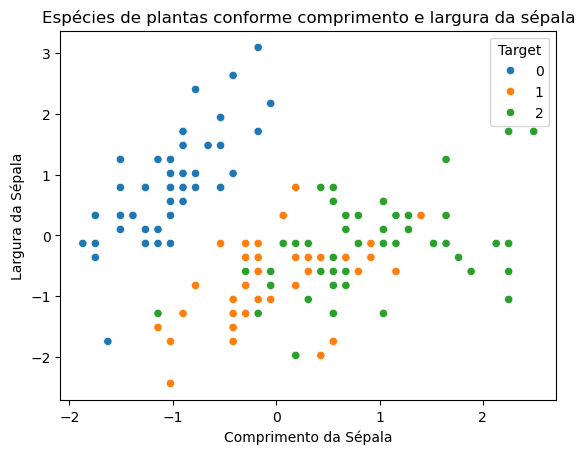

In [113]:
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='Target')

plt.title('Espécies de plantas conforme comprimento e largura da sépala')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')

plt.show()

Copia os dois atributos de interesse para a variável X, que é passada por parâmetro para o k-means.

Armazena os grupos identificados pelo algoritmo como um novo atributo do Dataframe (Grupos)

In [114]:
from sklearn.cluster import KMeans

X = df.drop('Target', axis=1)
modelo = KMeans(n_clusters=3, random_state=0, n_init=5)
modelo.fit(X)

print(modelo.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 0 2 2 2 0 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


c:\Users\bruno\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [115]:
df['Grupos'] = modelo.labels_
df['Grupos'] = df['Grupos'].astype(str)

df

,sepal length (cm),sepal width (cm),Target,Grupos
0,-0.900681,1.019004,0,1
1,-1.143017,-0.131979,0,1
2,-1.385353,0.328414,0,1
3,-1.506521,0.098217,0,1
4,-1.021849,1.249201,0,1
...,...,...,...,...
145,1.038005,-0.131979,2,2
146,0.553333,-1.282963,2,0
147,0.795669,-0.131979,2,2
148,0.432165,0.788808,2,2


Apresenta os gráficos com os rótulos originais e os rótulos gerados pelo k-means.

No segundo gráfico é possível perceber que nos casos em que há "mistura" de elementos, o k-means apresenta vários erros.

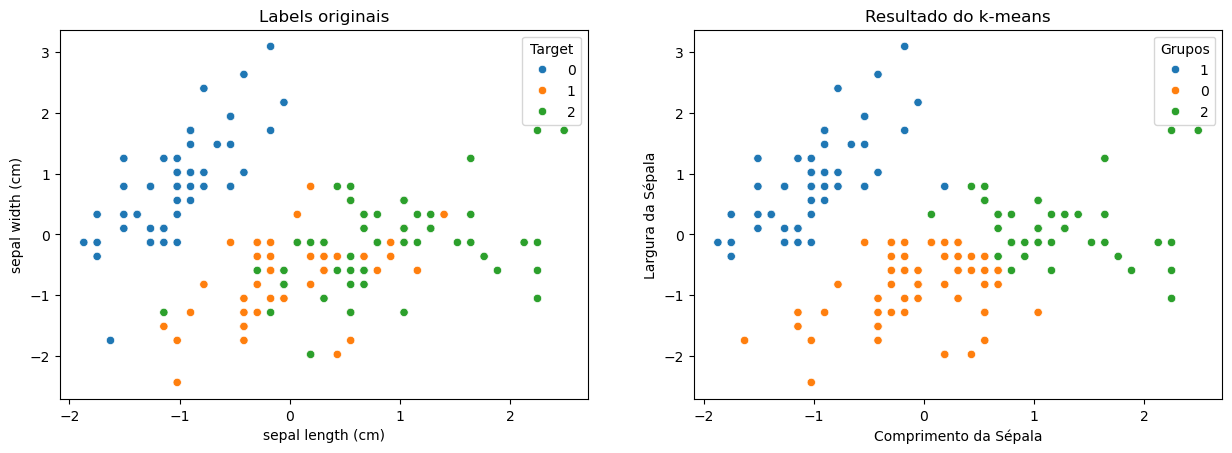

In [116]:
f, axes = plt.subplots(1, 2)
f.set_figwidth(15)
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='Target',ax=axes[0])
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='Grupos',ax=axes[1])

axes[0].set_title('Labels originais')
axes[1].set_title('Resultado do k-means')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')

plt.show()

Neste caso, em que os labels estão definidos é possível avaliar o resultado do k-means, usando as medidas já conhecidas para problemas de classificação.

In [117]:
df.loc[df['Grupos'] == '1', 'GruposCorrigidos'] = '0'
df.loc[df['Grupos'] == '0', 'GruposCorrigidos'] = '1'
df.loc[df['Grupos'] == '2', 'GruposCorrigidos'] = '2'
print(df)

     sepal length (cm)  sepal width (cm) Target Grupos GruposCorrigidos
0            -0.900681          1.019004      0      1                0
1            -1.143017         -0.131979      0      1                0
2            -1.385353          0.328414      0      1                0
3            -1.506521          0.098217      0      1                0
4            -1.021849          1.249201      0      1                0
..                 ...               ...    ...    ...              ...
145           1.038005         -0.131979      2      2                2
146           0.553333         -1.282963      2      0                1
147           0.795669         -0.131979      2      2                2
148           0.432165          0.788808      2      2                2
149           0.068662         -0.131979      2      0                1

[150 rows x 5 columns]


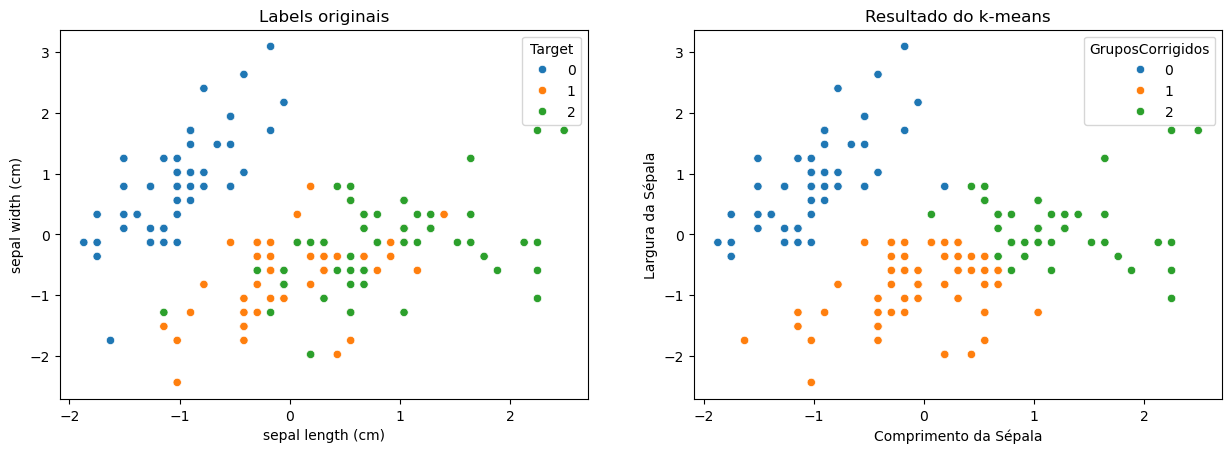

In [118]:
f, axes = plt.subplots(1, 2)
f.set_figwidth(15)
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='Target',ax=axes[0])
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='GruposCorrigidos',ax=axes[1])

axes[0].set_title('Labels originais')
axes[1].set_title('Resultado do k-means')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')

plt.show()

Apresenta a matriz de confusão

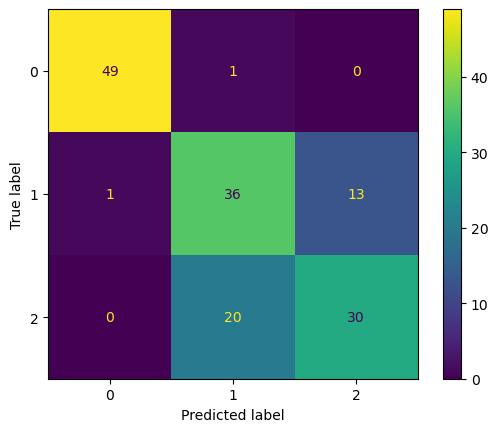

In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matriz = confusion_matrix(df['Target'],df['GruposCorrigidos'])
disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
disp.plot()
plt.show()


In [120]:
from sklearn.metrics import classification_report

resultados = classification_report(df['Target'],df['GruposCorrigidos'])

print(resultados)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.63      0.72      0.67        50
           2       0.70      0.60      0.65        50

    accuracy                           0.77       150
   macro avg       0.77      0.77      0.77       150
weighted avg       0.77      0.77      0.77       150



# **Parte 2** - Atividade

Importe o Dataset novamente, execute o k-means com todas as colunas disponíveis, calcule a matriz de confusão e as demais medidas de avaliação, e verifique se os resultados obtidos com as quatro colunas foram melhores do que apenas com duas.

In [121]:
from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.target
#Converte o valor do atributo Target para string para melhorar a visualização de cores nos gráficos gerados pelo seaborn
df['Target'] = df['Target'].astype(str)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [122]:
from sklearn.preprocessing import StandardScaler

transform = StandardScaler()

df['sepal length (cm)'] = transform.fit_transform(df['sepal length (cm)'].values.reshape(-1,1))
df['sepal width (cm)'] = transform.fit_transform(df['sepal width (cm)'].values.reshape(-1,1))
df['petal length (cm)'] = transform.fit_transform(df['petal length (cm)'].values.reshape(-1,1))
df['petal width (cm)'] = transform.fit_transform(df['petal width (cm)'].values.reshape(-1,1))

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


In [123]:
from sklearn.cluster import KMeans

X = df.drop('Target', axis=1)
modelo = KMeans(n_clusters=3, random_state=0, n_init=5)
modelo.fit(X)

print(modelo.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


c:\Users\bruno\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [124]:
df['Grupos'] = modelo.labels_
df['Grupos'] = df['Grupos'].astype(str)

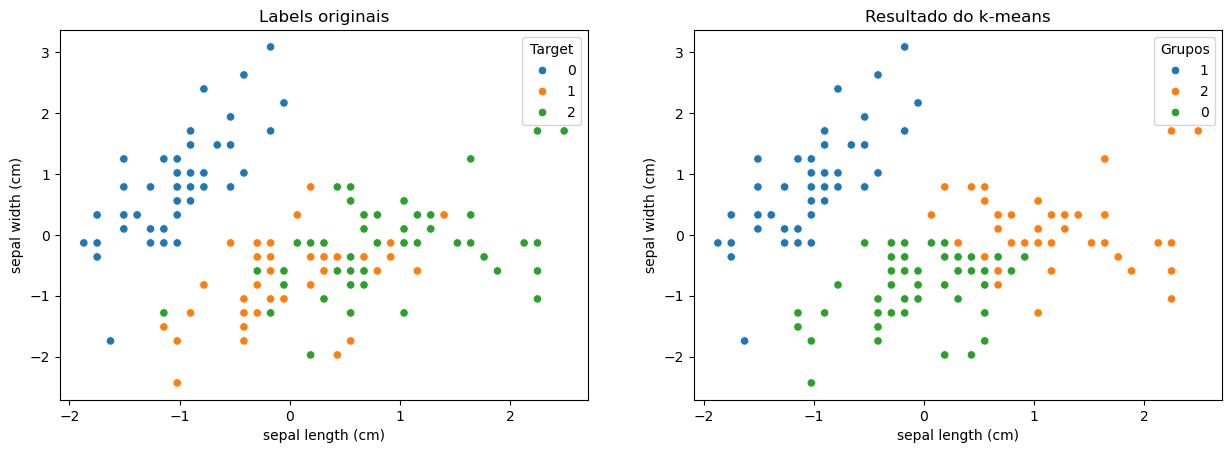

In [125]:
f, axes = plt.subplots(1, 2)
f.set_figwidth(15)
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='Target',ax=axes[0])
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='Grupos',ax=axes[1])

axes[0].set_title('Labels originais')
axes[1].set_title('Resultado do k-means')

plt.show()

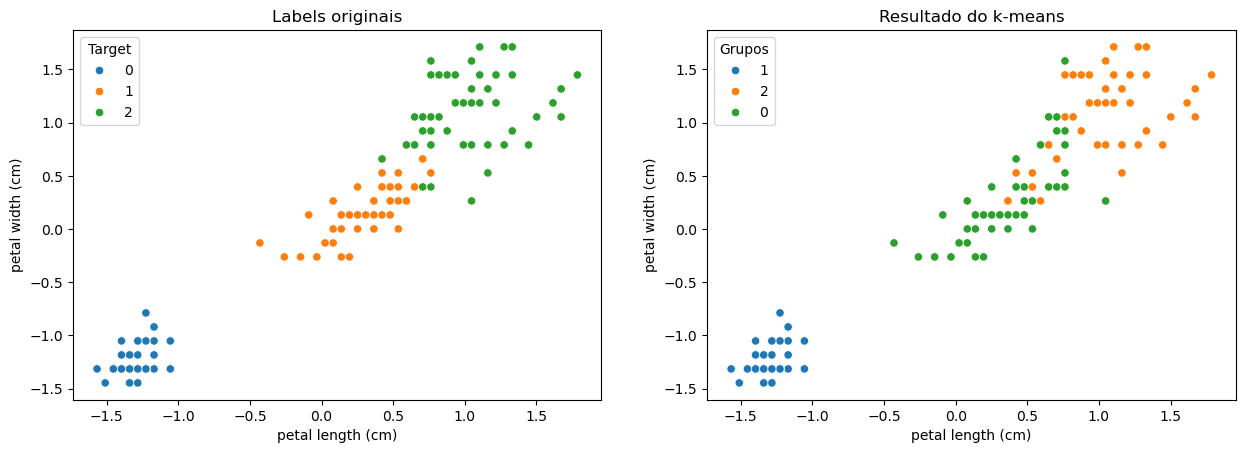

In [126]:
f, axes = plt.subplots(1, 2)
f.set_figwidth(15)
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='Target',ax=axes[0])
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='Grupos',ax=axes[1])

axes[0].set_title('Labels originais')
axes[1].set_title('Resultado do k-means')

plt.show()

In [127]:
df.loc[df['Grupos'] == '1', 'GruposCorrigidos'] = '0'
df.loc[df['Grupos'] == '0', 'GruposCorrigidos'] = '1'
df.loc[df['Grupos'] == '2', 'GruposCorrigidos'] = '2'
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0            -0.900681          1.019004          -1.340227         -1.315444   
1            -1.143017         -0.131979          -1.340227         -1.315444   
2            -1.385353          0.328414          -1.397064         -1.315444   
3            -1.506521          0.098217          -1.283389         -1.315444   
4            -1.021849          1.249201          -1.340227         -1.315444   
..                 ...               ...                ...               ...   
145           1.038005         -0.131979           0.819596          1.448832   
146           0.553333         -1.282963           0.705921          0.922303   
147           0.795669         -0.131979           0.819596          1.053935   
148           0.432165          0.788808           0.933271          1.448832   
149           0.068662         -0.131979           0.762758          0.790671   

    Target Grupos GruposCor

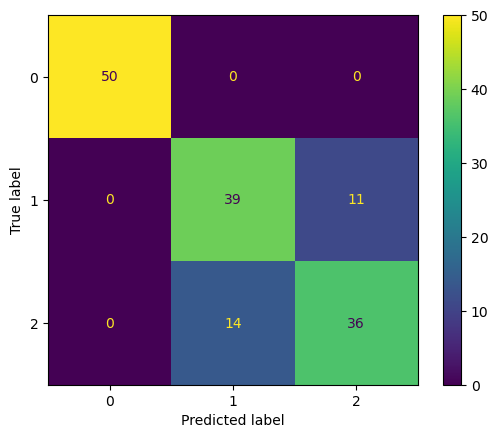

In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matriz = confusion_matrix(df['Target'],df['GruposCorrigidos'])
disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
disp.plot()
plt.show()

In [129]:
from sklearn.metrics import classification_report

resultados = classification_report(df['Target'],df['GruposCorrigidos'])

print(resultados)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

